In [7]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import random


In [8]:
df = pd.read_csv("mushrooms_dataset.csv")

In [9]:
# 1 step - Perform EDA

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
df.shape

(8124, 23)

In [12]:
df.index

RangeIndex(start=0, stop=8124, step=1)

In [13]:
df.columns.unique()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

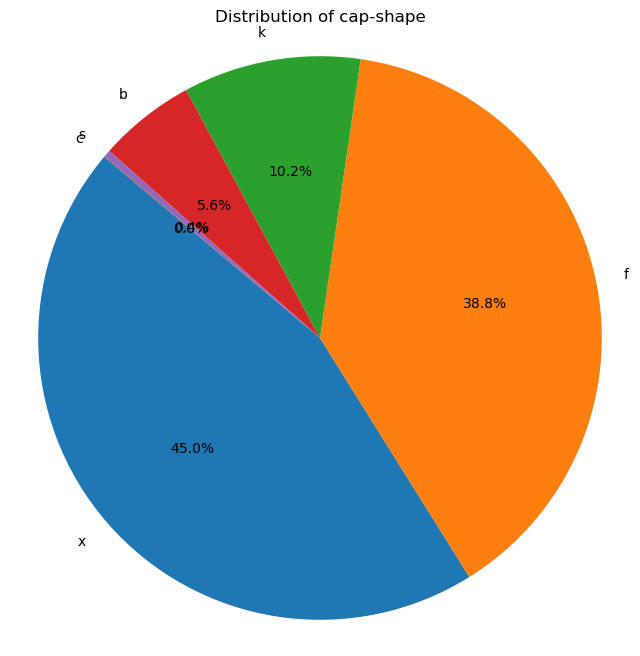

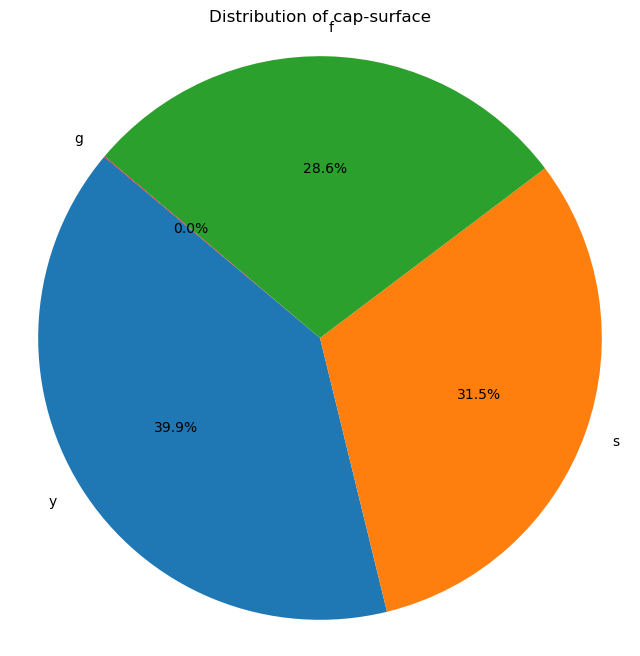

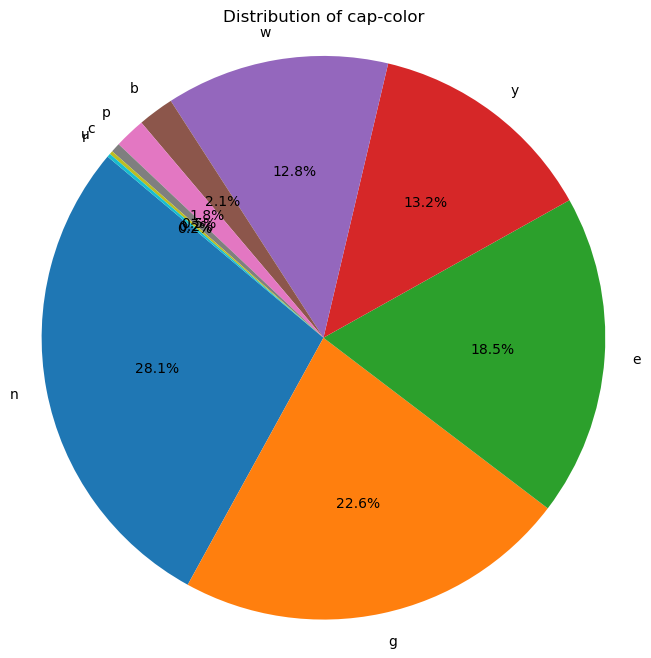

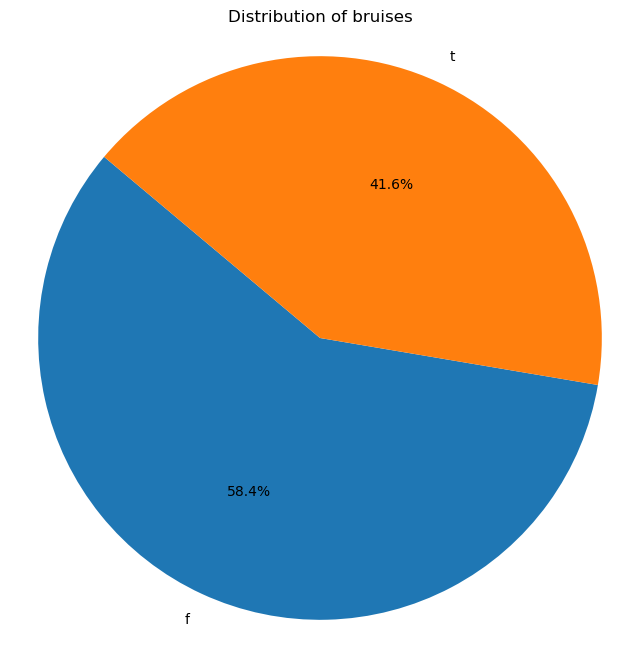

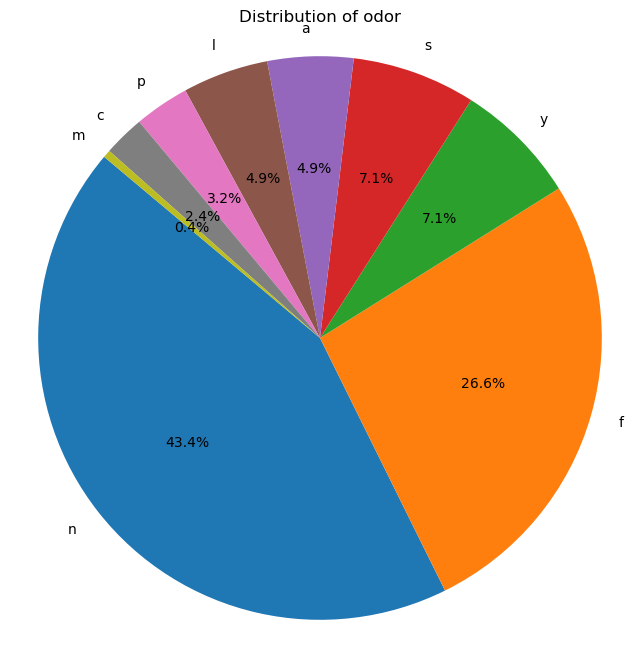

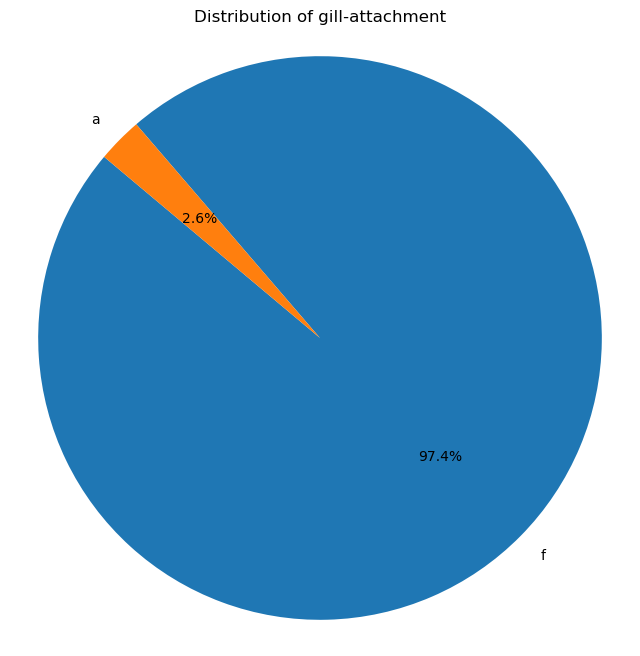

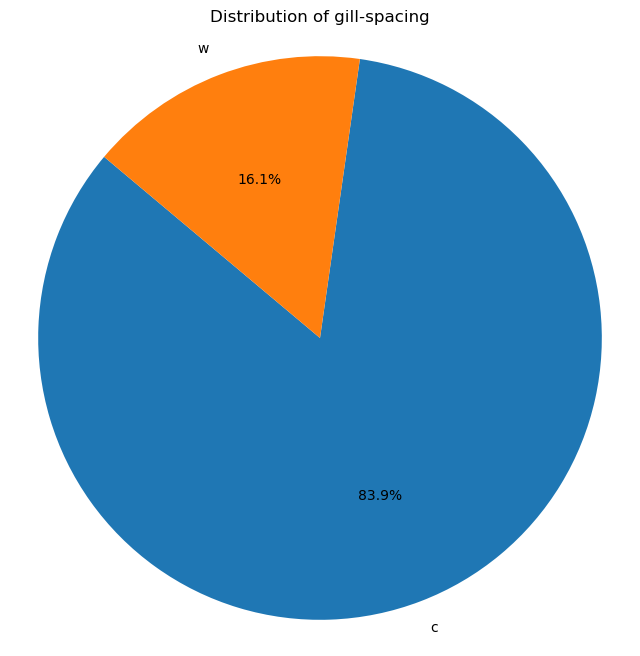

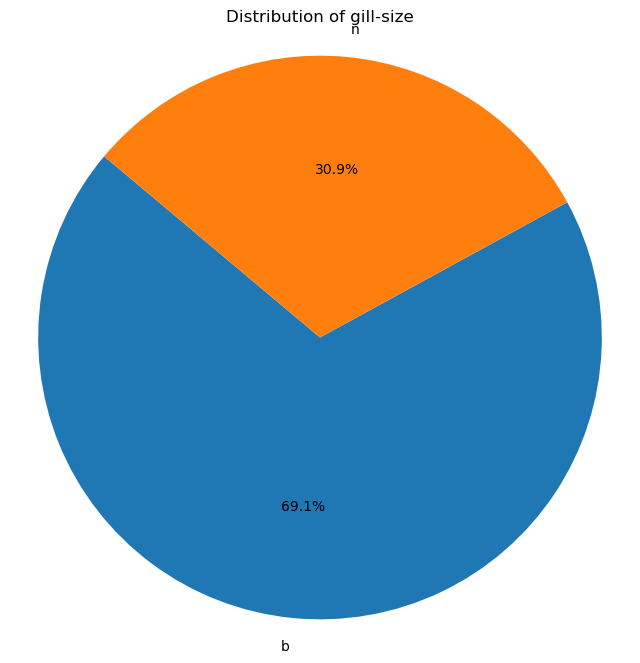

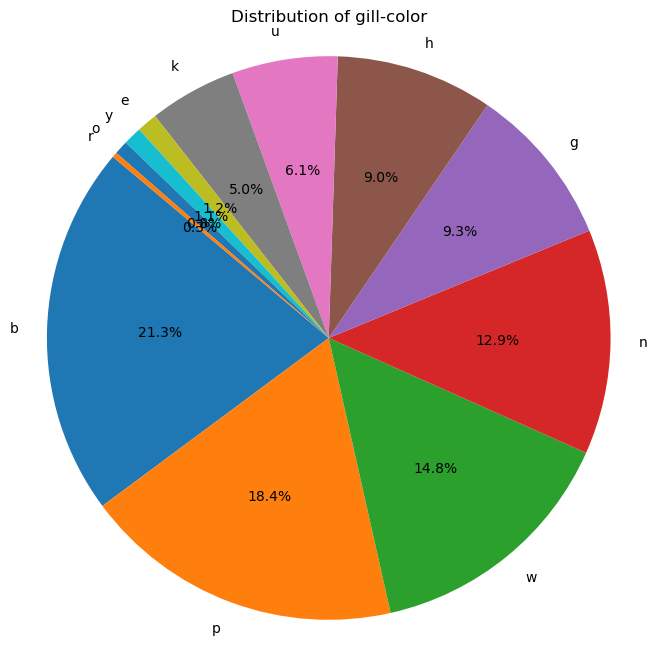

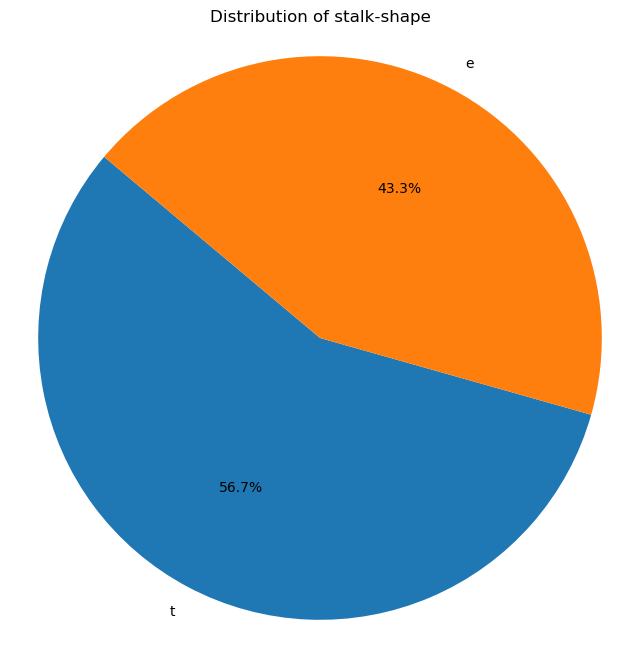

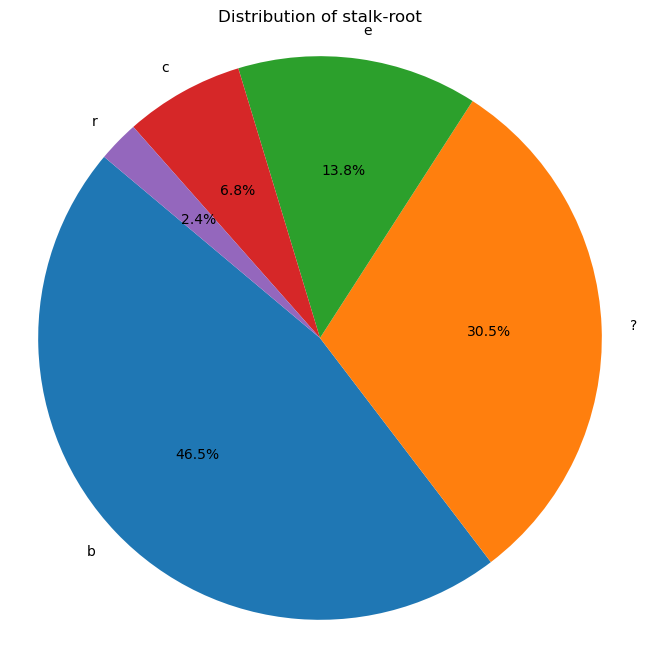

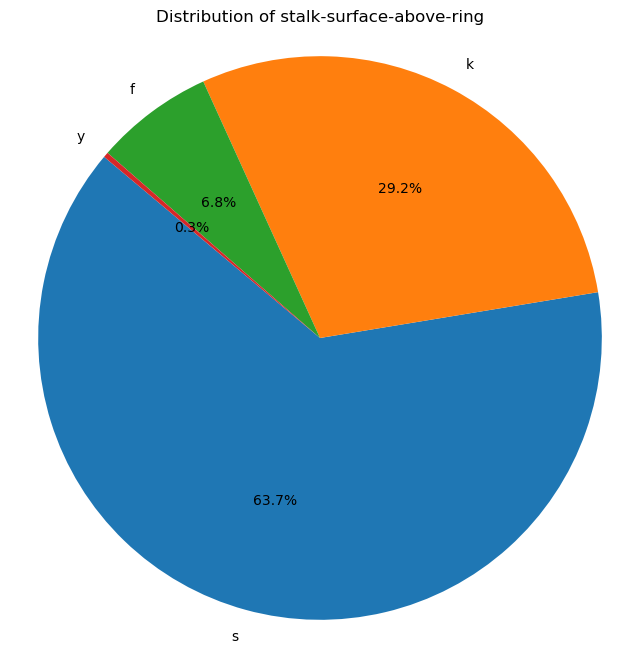

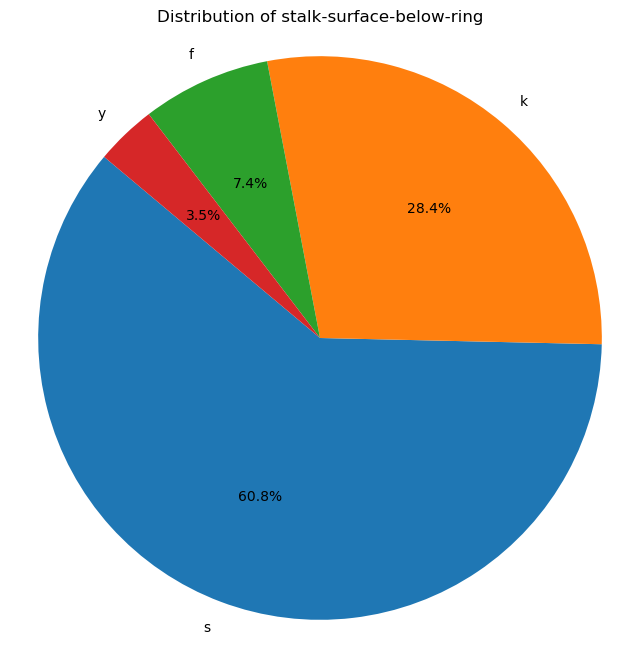

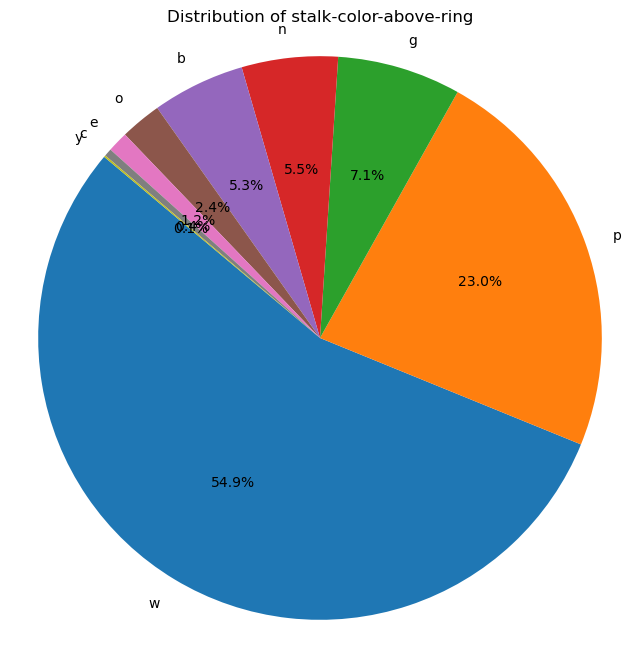

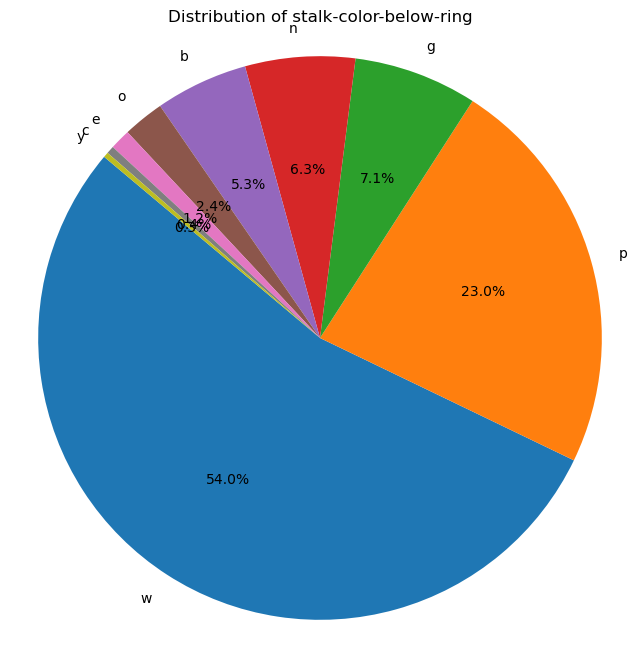

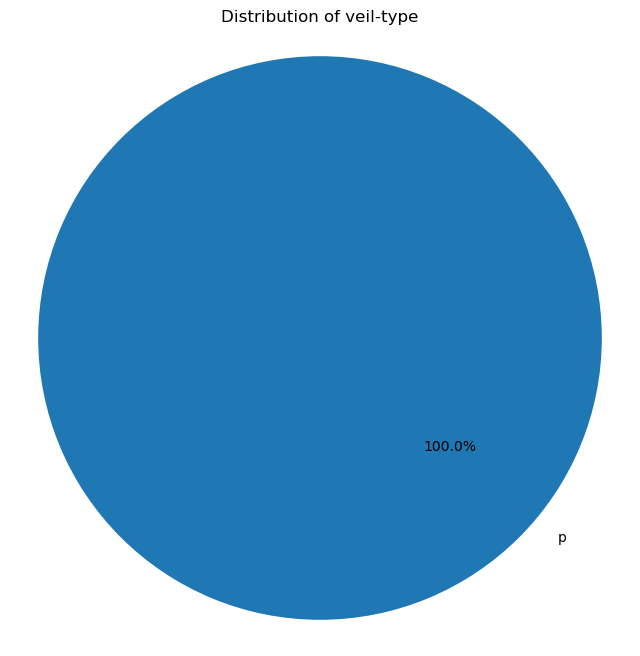

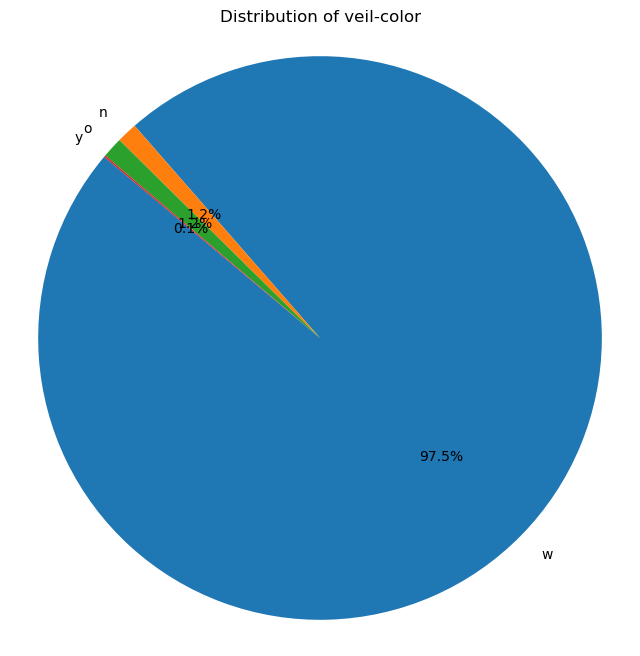

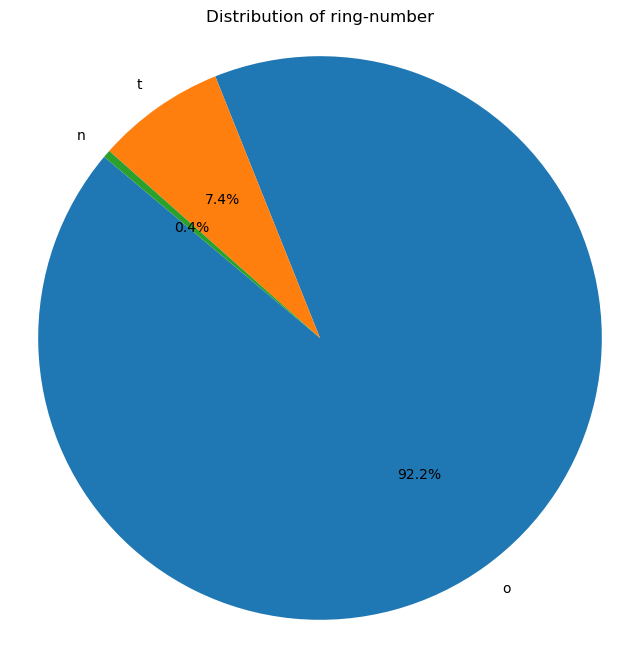

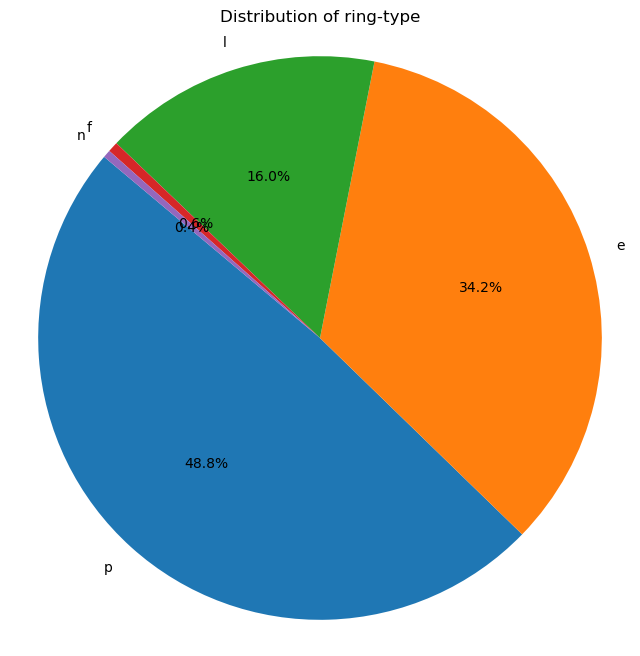

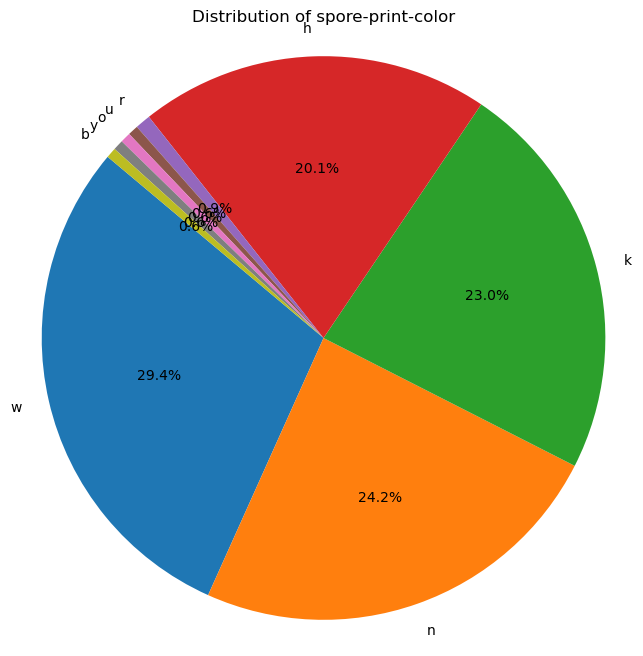

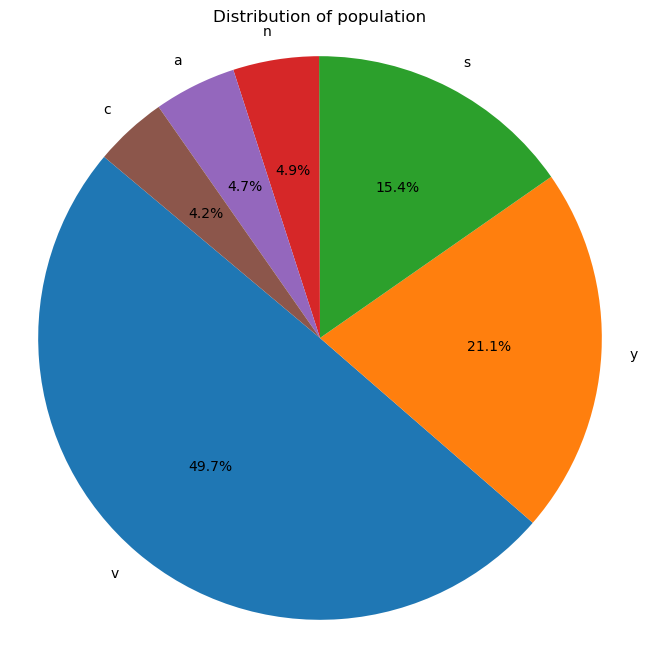

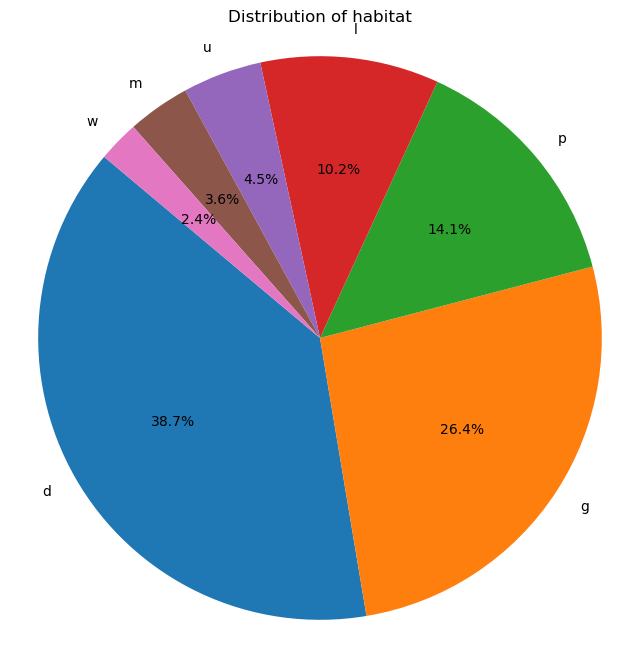

In [16]:
# Get a list of all columns except the 'class' column
feature_columns = df.columns[df.columns != 'class']

# Iterate through each feature column and create a pie chart
for column in feature_columns:
    counts = df[column].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

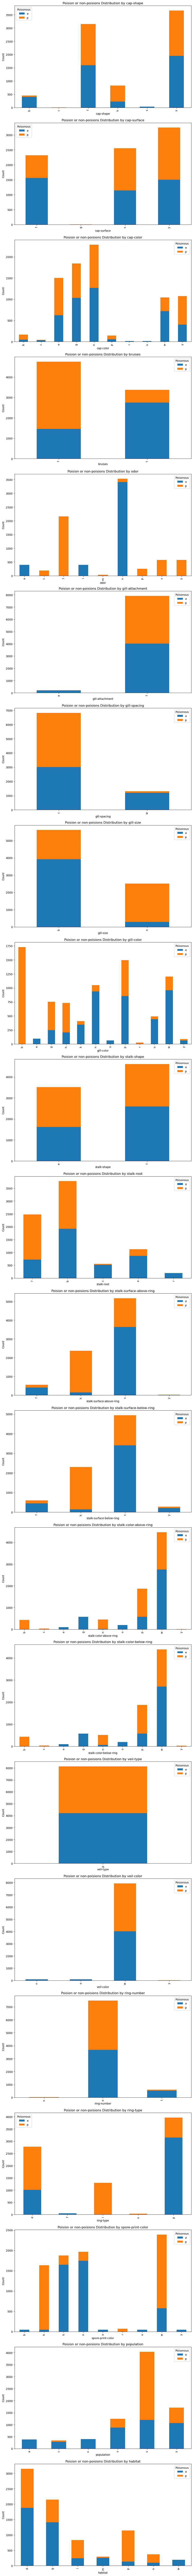

In [17]:
# Get a list of all columns except the 'class' column
feature_columns = df.columns[df.columns != 'class']

# Create subplots to display bar charts for each feature
fig, axes = plt.subplots(nrows=len(feature_columns), ncols=1, figsize=(10, 6 * len(feature_columns)))

# Iterate through each feature column and create a bar chart
for i, column in enumerate(feature_columns):
    pivot_table = df.pivot_table(index=column, columns='class', aggfunc='size', fill_value=0)
    ax = pivot_table.plot(kind='bar', stacked=True, ax=axes[i])
    ax.set_title(f'Poision or non-poisions Distribution by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title='Poisonous')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#2 Step - Cleaning the data

In [18]:
# from the above vizualisation we can see that under the column "stalk-root" that has the the value "?", which is not defined in the "Text-to-Read", therefor it should be see as a "NaN" value.
# from the above desription of the data it can be obsvered that we have 8124 observations in the data and we would like to se how many of the observations has the "?" value

In [19]:
question_mark_count =(df['stalk-root']=="?").sum()

In [20]:
print(question_mark_count)

2480


In [21]:
# From the above code it has been counted the sum of "?". This means that if we deleted every observation with countined a NaN value it would reduce the total number of the observations as the following:

In [22]:
# Given that this would reduce the total number of observations drasticly we choose to deleted the columns "Stalk-root" from the dataset

In [23]:
# Moreover, from the above visuliazation it can be seen that "veil-type" only has one variable, so it will also be deleted

In [24]:
data = df.drop(columns=["veil-type","stalk-root"])

In [25]:
data.columns.unique()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [26]:
data.shape

(8124, 21)

#3 Step - Preproc

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column]) # Transforming our data from letters value to numerical values.

In [28]:
copy =data.copy()

In [29]:
# Categories in each feature x
column_list = data.columns.values.tolist()
#print(column_list)
for column_name in column_list: # Printing out our columns liste to give a overview of its value and what the new value is representing
    print(f'\033[1m{column_name}\033[0m')
    print(copy[column_name].unique())
    print(list(map(str,df[column_name].unique())))
    print('\n')

class
[1 0]
['p', 'e']


cap-shape
[5 0 4 2 3 1]
['x', 'b', 's', 'f', 'k', 'c']


cap-surface
[2 3 0 1]
['s', 'y', 'f', 'g']


cap-color
[4 9 8 3 2 5 0 7 1 6]
['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r']


bruises
[1 0]
['t', 'f']


odor
[6 0 3 5 2 1 8 7 4]
['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']


gill-attachment
[1 0]
['f', 'a']


gill-spacing
[0 1]
['c', 'w']


gill-size
[1 0]
['n', 'b']


gill-color
[ 4  5  2  7 10  3  9  1  0  8 11  6]
['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o']


stalk-shape
[0 1]
['e', 't']


stalk-surface-above-ring
[2 0 1 3]
['s', 'f', 'k', 'y']


stalk-surface-below-ring
[2 0 3 1]
['s', 'f', 'y', 'k']


stalk-color-above-ring
[7 3 6 4 0 2 5 1 8]
['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y']


stalk-color-below-ring
[7 6 3 0 4 2 8 5 1]
['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c']


veil-color
[2 0 1 3]
['w', 'n', 'o', 'y']


ring-number
[1 2 0]
['o', 't', 'n']


ring-type
[4 0 2 1 3]
['p', 'e', 'l', 'f', 'n']


spore-print-color
[

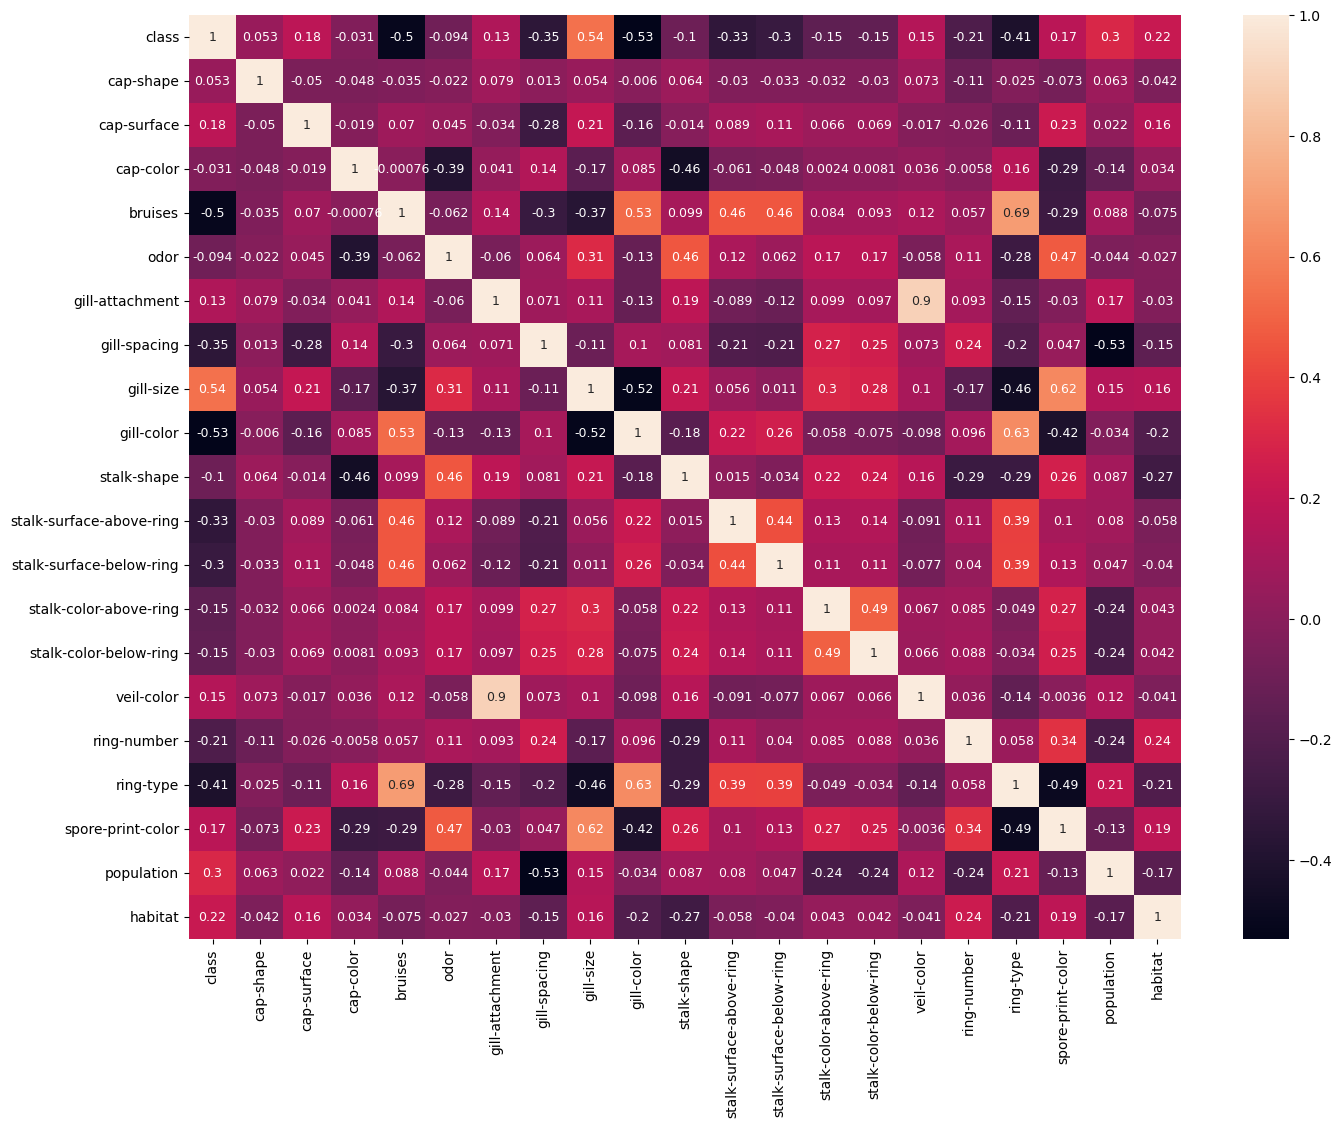

In [30]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True, annot_kws={'size':9})
plt.show()

In [31]:
scaler = StandardScaler() # HUSKTEORI
trans = scaler.fit_transform(data.iloc[:,1:])

In [32]:
trans

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [33]:
data.iloc[:,1:] = trans

In [34]:
data.iloc[:,1:]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,0.683778,0.586385,-0.429288,-0.416681,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,0.683778,-0.893053,0.622441,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [35]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,0,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,0,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,0,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,0,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,...,0.683778,0.586385,-0.429288,-0.416681,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,0,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,1,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,...,0.683778,-0.893053,0.622441,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [36]:
X = data.iloc[:,1:]
y =data['class']

In [37]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,0.683778,0.586385,-0.429288,-0.416681,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,0.683778,-0.893053,0.622441,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [38]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

# Fitting SML models

In [39]:
#train test split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) #Test size 20%

In [40]:
#Creating variable model and setting it to logisticregression
lr = LogisticRegression()


In [41]:
#We call our model variable and add .fit to train the model, then we input the split training data from the previous part
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
#creates variabled for predicting and showing probability, both with X_test as parameters
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)


In [43]:
#Precision is a measure of accuracy, it's an answer to how many of the items labeled as positive by the model were actually positive
#Precision = True positives / (True positives + False positives), so it's a ratio of _correctly_ predicted positives compared to the total predicted positives

#Recall tells us how many of the actual positives were predicted positive by the classifier
#Recall = True positives / (True Positives + False Negatives), so it's a ratio of correctly predicted positives to the total actual positives

#F1 combines precision and recall for a total score of the prediction, from 0 to 1, 1 being perfect.
#F1 = 2 x ((Precision x Recall) / (Precision + Recall))

In [44]:
print("LogisticRegression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

LogisticRegression Accuracy: 0.944
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       843
           1       0.94      0.94      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

Confusion Matrix:
 [[796  47]
 [ 44 738]]


In [45]:
#Based on everything we've been told in class, having an instant accuracy of 100% is a major red flag but like good knowitall students, we will ignore that for now and test some more models maybe knowing what mushrooms to eat is easy for SupervisedMachineLearning models

In [46]:
#Creating variable model and setting it to DT, random state to ensure reproduceable results. Named dt_ to not overwrite previous input and to make it easier to recall later
dt_model= DecisionTreeClassifier(random_state=42)

#We call our model variable and add .fit to train the model, then we input the split training data from the previous part
dt_model.fit(X_train, y_train)

#creates variabled for predicting and showing probability, both with X_test as parameters.
dt_y_pred = dt_model.predict(X_test)

#Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))

Decision Tree Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]


In [47]:
#Creating variable model and setting it to DT, random state to ensure reproduceable results. Named rf_ to not overwrite previous input and to make it easier to recall later
rf_model = RandomForestClassifier(random_state=42)

#We call our model variable and add .fit to train the model, then we input the split training data from the previous part.
rf_model.fit(X_train, y_train)

#creates variabled for predicting and showing probability, both with X_test as parameters.
rf_y_pred = rf_model.predict(X_test)

#Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]


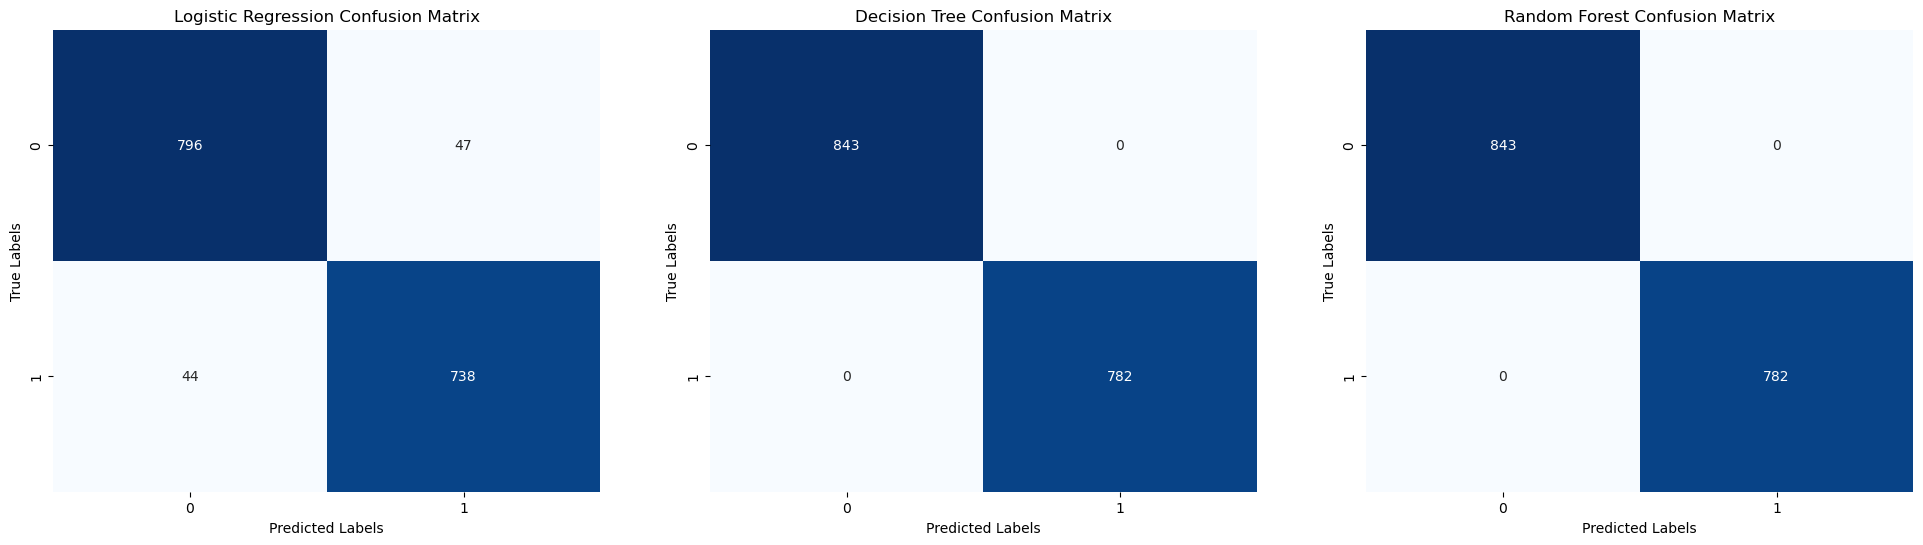

In [48]:
#The confusion matrix gives a quick overview of true and predicted labels
#Variable setting parameters for the scikit confusion_matrix function setting it to our test and prediction data
cm = confusion_matrix(y_test, y_pred)
dt = confusion_matrix(y_test, dt_y_pred)
rf = confusion_matrix(y_test, rf_y_pred)

#Visualize the confusion matrix with Seaborn using subplots so we can do 3in1
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

#Logistic Regression
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

#Decision Tree
sns.heatmap(dt, annot=True, fmt='g', cmap='Blues', cbar=False, ax=ax[1])
ax[1].set_title('Decision Tree Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

#Random Forest
sns.heatmap(rf, annot=True, fmt='g', cmap='Blues', cbar=False, ax=ax[2])
ax[2].set_title('Random Forest Confusion Matrix')
ax[2].set_xlabel('Predicted Labels')
ax[2].set_ylabel('True Labels')

plt.show()

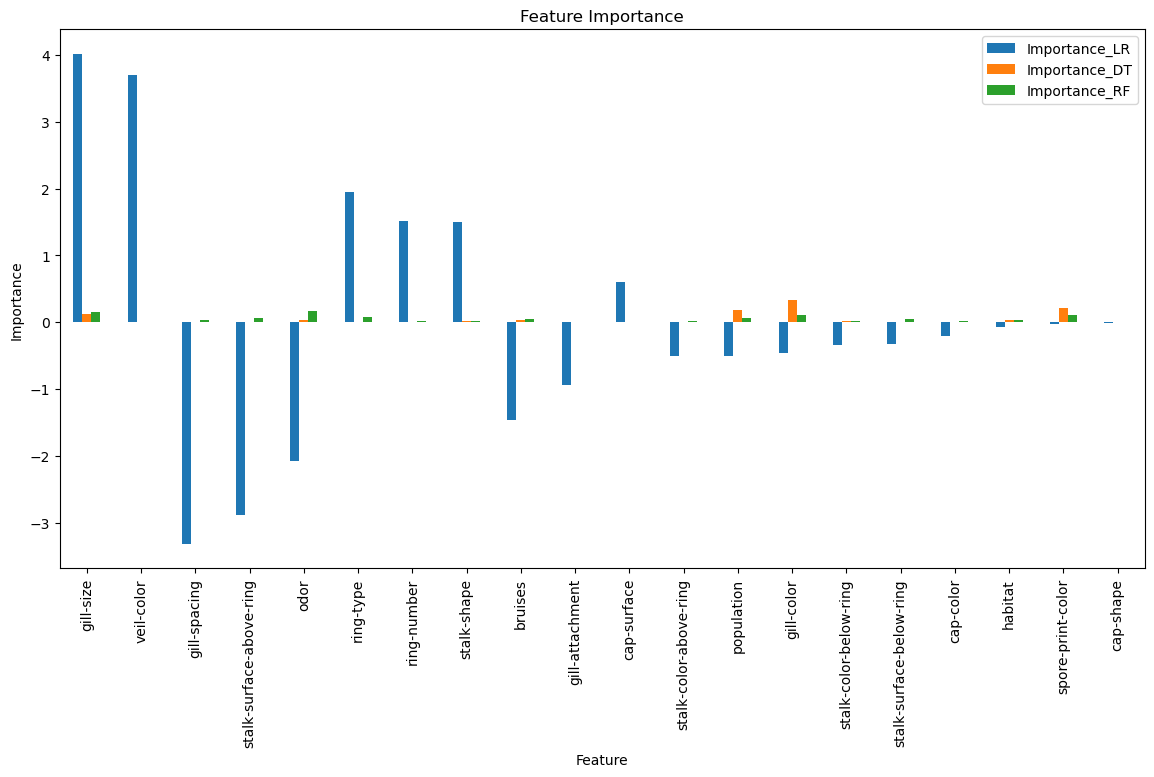

In [49]:
#logistic regression
lr_importance = lr.coef_[0]

#Decision Tree
dt_importance = dt_model.feature_importances_

#Random Forest
rf_importance = rf_model.feature_importances_

#Feature Names
feature_names = X_train.columns.tolist()

#Create a DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance_LR': lr_importance,
    'Importance_DT': dt_importance,
    'Importance_RF': rf_importance
})

#Set Feature as Index
importance_df.set_index('Feature', inplace=True)

#Sort the DataFrame by the magnitude (absolute value) of the Logistic Regression Coefficients
importance_df.sort_values(by='Importance_LR', key=np.abs, ascending=False, inplace=True)

#Plot Feature Importances
importance_df.plot(kind='bar', figsize=(14,7))
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()

In [50]:
!pip install shap

In [51]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [52]:
explainer = shap.TreeExplainer(rf_model)

In [53]:
shap_values_rf = explainer.shap_values(X)

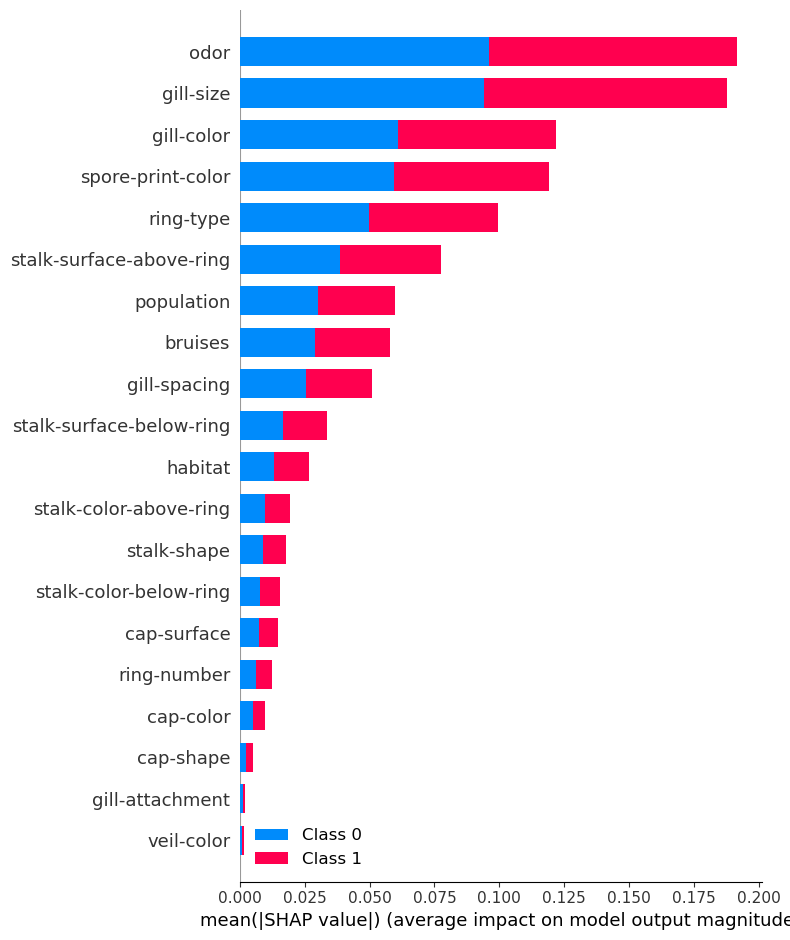

In [54]:
shap.summary_plot(shap_values_rf, X, plot_type="bar")

In [55]:
explainer_dt = shap.TreeExplainer(dt_model)

In [56]:
shap_values_dt = explainer_dt.shap_values(X)

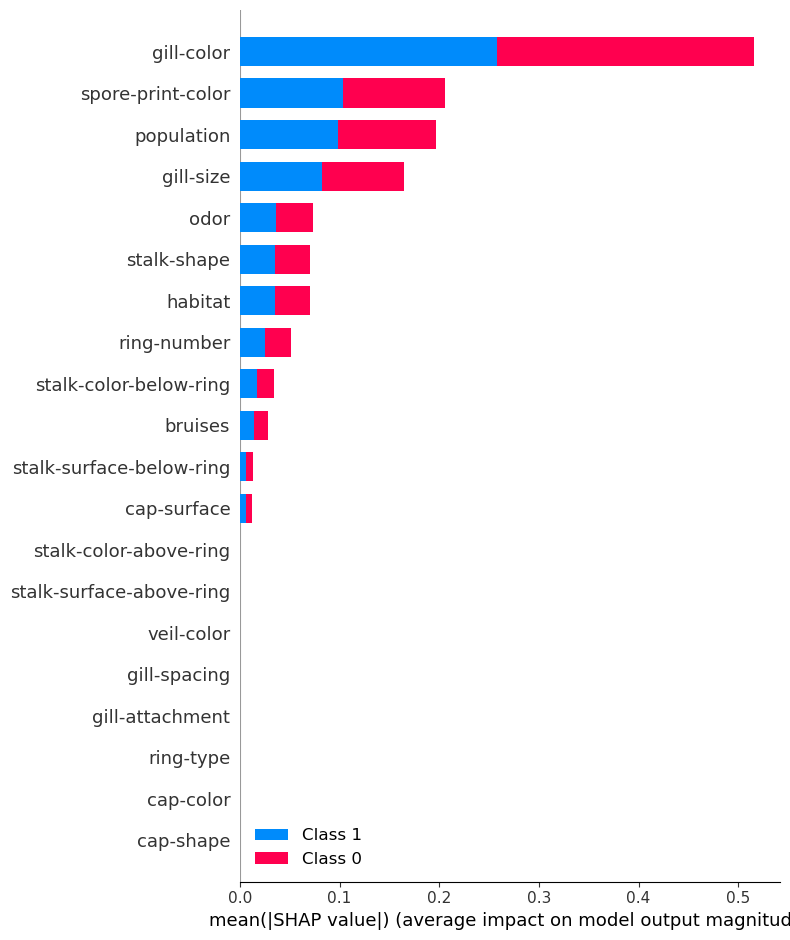

In [57]:
shap.summary_plot(shap_values_dt, X, plot_type="bar")

In [59]:
#explainer_lr = shap.LinearExplainer(lr)

TypeError: Linear.__init__() missing 1 required positional argument: 'masker'

In [ ]:
#Based on the feature importance vizualized above we want to remove features that do not help us identifying poisonous mushrooms.

In [60]:
data1 = data[['class','odor']] #EXTREME feature testing

In [61]:
X1 = data1.iloc[:,1:]
y1 =data1['class']

In [62]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [63]:
#Same as earlier but now using odor as our only feature
rf_model1 = RandomForestClassifier(random_state=42)

rf_model1.fit(X_train1, y_train1)

rf_y_pred1 = rf_model1.predict(X_test1)

print("Random Forest Accuracy:", accuracy_score(y_test1, rf_y_pred1))
print("Classification Report:\n", classification_report(y_test1, rf_y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test1, rf_y_pred1))

Random Forest Accuracy: 0.9846153846153847
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       843
           1       1.00      0.97      0.98       782

    accuracy                           0.98      1625
   macro avg       0.99      0.98      0.98      1625
weighted avg       0.99      0.98      0.98      1625

Confusion Matrix:
 [[843   0]
 [ 25 757]]


In [64]:
#Same as earlier but now using odor as our only feature
dt_model1= DecisionTreeClassifier(random_state=42)

dt_model1.fit(X_train1, y_train1)

dt_y_pred1 = dt_model1.predict(X_test1)

print("Decision Tree Accuracy:", accuracy_score(y_test1, dt_y_pred1))
print("Classification Report:\n", classification_report(y_test1, dt_y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test1, dt_y_pred1))

Decision Tree Accuracy: 0.9846153846153847
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       843
           1       1.00      0.97      0.98       782

    accuracy                           0.98      1625
   macro avg       0.99      0.98      0.98      1625
weighted avg       0.99      0.98      0.98      1625

Confusion Matrix:
 [[843   0]
 [ 25 757]]


In [65]:
#Same as earlier but now using odor as our only feature
lr1 = LogisticRegression()

lr1.fit(X_train1, y_train1)

y_pred1 = lr1.predict(X_test1)
y_prob1 = lr1.predict_proba(X_test1)

print("LogisticRegression Accuracy:", accuracy_score(y_test1, y_pred1))
print("Classification Report:\n", classification_report(y_test1, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred1))

LogisticRegression Accuracy: 0.6996923076923077
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73       843
           1       0.73      0.60      0.66       782

    accuracy                           0.70      1625
   macro avg       0.70      0.70      0.69      1625
weighted avg       0.70      0.70      0.70      1625

Confusion Matrix:
 [[670 173]
 [315 467]]


In [66]:
#Now we want to test a model that include only relevant features that seem feasible to accuratly characterize while out in the woods. 
#This value judgement also excludes the more intricate and labor intesive observations

In [67]:
data2 = data[['class','gill-color','gill-size','stalk-surface-above-ring','population']] #Intuitive feature testing

In [68]:
X2 = data2.iloc[:,1:]
y2 =data2['class']

In [69]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [70]:
#Same as earlier but now using only intuitive features
rf_model2 = RandomForestClassifier(random_state=42)

rf_model2.fit(X_train2, y_train2)

rf_y_pred2 = rf_model2.predict(X_test2)

print("Random Forest Accuracy:", accuracy_score(y_test2, rf_y_pred2))
print("Classification Report:\n", classification_report(y_test2, rf_y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test2, rf_y_pred2))

Random Forest Accuracy: 0.9538461538461539
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       843
           1       0.95      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix:
 [[807  36]
 [ 39 743]]


In [71]:
datan = data.drop(columns=['cap-shape', 'cap-surface', 'cap-color', 
       'gill-attachment','stalk-shape', 'stalk-surface-above-ring', 
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 
       'habitat'])

In [72]:
Xn = datan.iloc[:,1:]
yn =datan['class']

In [73]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn,yn,test_size=0.2,random_state=42) #Test size 20%

In [74]:
#Creating variable model and setting it to DT, random state to ensure reproduceable results. Named rf_ to not overwrite previous input and to make it easier to recall later
rfn_model = RandomForestClassifier(random_state=42)

#We call our model variable and add .fit to train the model, then we input the split training data from the previous part.
rfn_model.fit(Xn_train, yn_train)

#creates variabled for predicting and showing probability, both with X_test as parameters.
rfn_y_pred = rfn_model.predict(Xn_test)

#Evaluation
print("Random Forest Accuracy:", accuracy_score(yn_test, rfn_y_pred))
print("Classification Report:\n", classification_report(yn_test, rfn_y_pred))
print("Confusion Matrix:\n", confusion_matrix(yn_test, rfn_y_pred))

Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]


In [75]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [76]:
# Conducting PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [77]:
# Reducing dimensions for visualization purposes (2 components)
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "c:\Users\Holte\Anaconda python\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

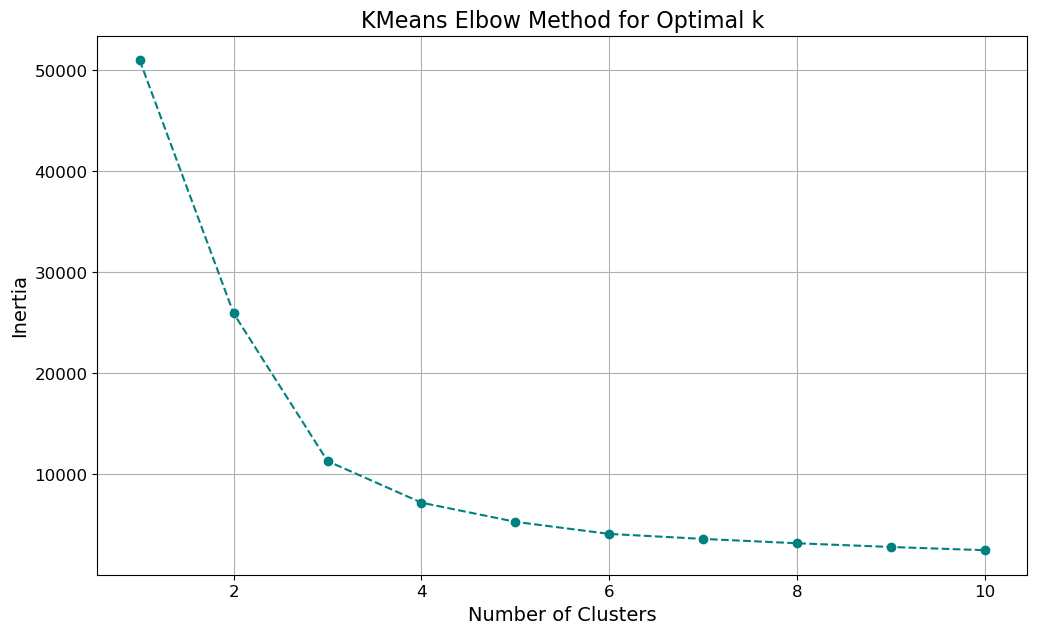

In [78]:
# Determining the optimal number of clusters for KMeans using the Elbow method
clusters = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_pca_2d)
    clusters.append(kmeans.inertia_)
plt.figure(figsize=(12,7))
plt.plot(range(1, 11), clusters, marker='o', linestyle='--', color='teal')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('KMeans Elbow Method for Optimal k', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [100]:
# Conducting KMeans clustering (assuming 4 clusters from the elbow method)
kmeans = KMeans(n_clusters=23, random_state=0).fit(X_pca_2d)
labels = kmeans.labels_

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


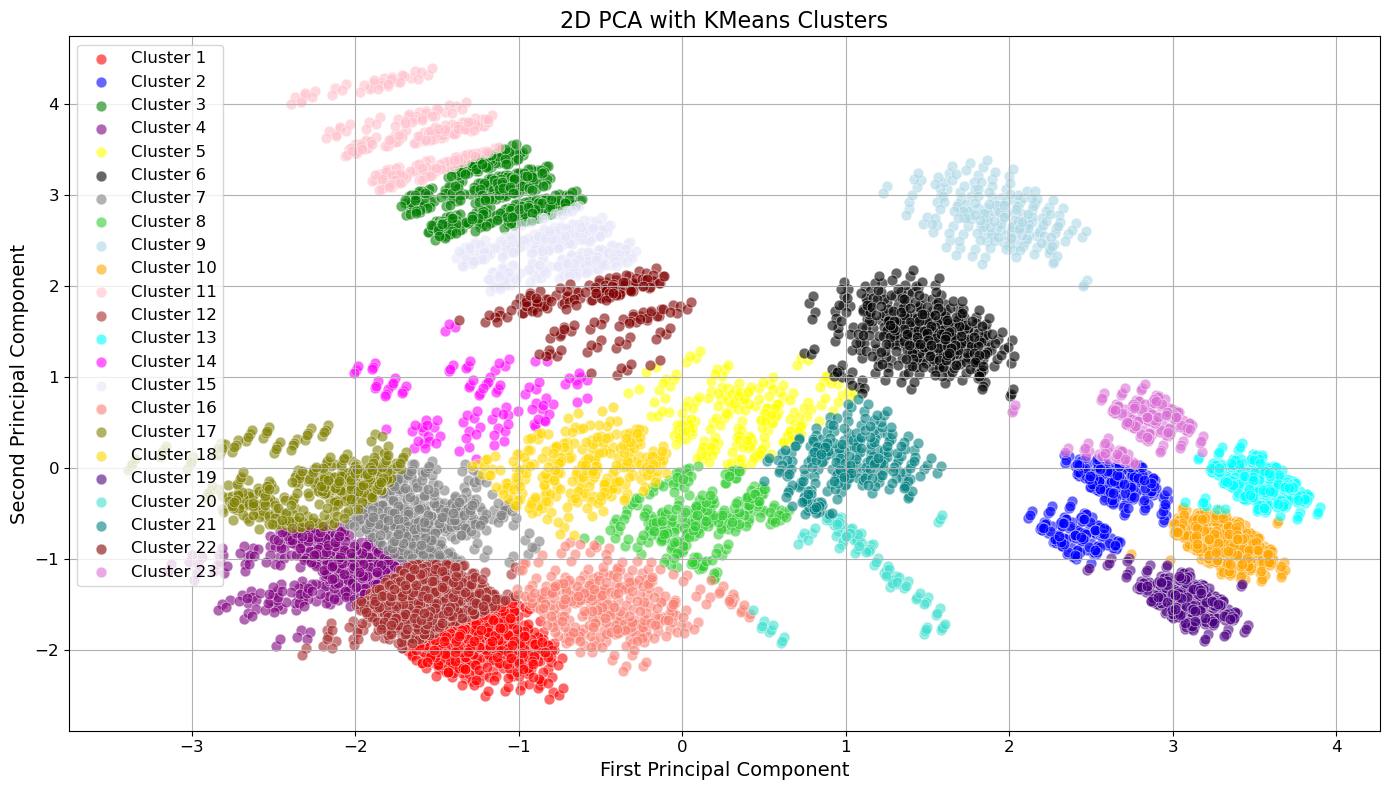

In [102]:
colors = ['red', 'blue', 'green', 'purple','yellow','black','grey','limegreen','lightblue',
          'orange', 'pink', 'brown', 'cyan', 'magenta', 'lavender', 'salmon', 'olive', 'gold',
          'indigo', 'turquoise', 'teal', 'maroon', 'orchid']

plt.figure(figsize=(14,8))
for i, color, label in zip(range(23), colors, 
                           [f'Cluster {i+1}' for i in range(23)]):
    plt.scatter(X_pca_2d[labels == i, 0], X_pca_2d[labels == i, 1], s=60, 
                c=color, label=label, alpha=0.6, edgecolors='w', linewidth=0.5)

plt.legend(fontsize=12)
plt.title('2D PCA with KMeans Clusters', fontsize=16)
plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
??colors

Type:        list
String form: ['red', 'blue', 'green', 'purple', 'yellow']
Length:      5
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.